In [2]:
## 다음 자료는 캘리포니아 주택가격자료입니다. 
#### 이 데이터를 가지고 함께 eda를 진행해보도록 하겠습니다
## 데이터를 가져옵니다. .
import pandas as pd
import matplotlib.pyplot as plt
cali = pd.read_csv("C://Users//USER//Desktop//cali.csv")

In [3]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [7]:
##가장 눈에 띄는 변수는 ocean_proximity이다.factor형 변수인듯. 몇개로 구성되어있는지 확인.
cali['ocean_proximity'].unique()

##Near Bay, 1th Ocean, Inland, Near Ocean, Island 총 5개가 있다. 

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## df.plot.barh()를 이용하여 total_bedrooms population household의 ocean_proximity 별 평균을 시각화해보아라

In [4]:
## 이 다섯개 ocean_proximity 에 따른 housing_median_age, total_rooms, total_bedrooms, population, households, median_income을 알고 싶다면?
## 각각 평균을 내고 ocean_proximity 에 따라 bar plot을 그리면 된다. 
## (1) 먼저 이에 해당되는 dataframe 형성(groupby)
## 이때 total rooms 와 median_house_value housing_median_age는 단위가 혼자 튀기 때문에 이 두변수를 제거한 dataframe을 만들어줍니다. 
cali0=cali[cali.columns[2:]]

cali1=cali0.drop(['total_rooms','median_house_value','housing_median_age'],1)

mean_cal=cali1.groupby('ocean_proximity').mean()
mean_cal

,total_bedrooms,population,households,median_income
ocean_proximity,,,,
<1H OCEAN,546.539185,1520.290499,517.744965,4.230682
INLAND,533.881619,1391.046252,477.447565,3.208996
ISLAND,420.400000,668.000000,276.600000,2.744420
NEAR BAY,514.182819,1230.317467,488.616157,4.172885
NEAR OCEAN,538.615677,1354.008653,501.244545,4.005785


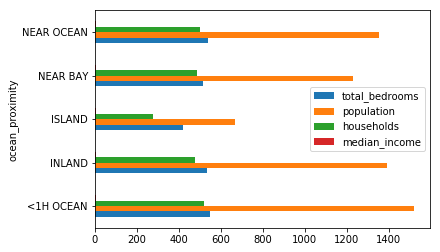

In [5]:
##한눈에 시각화!
mean_cal.plot.barh()

## Subplot을 이용하여 4개의 그래프를 만들어라! 

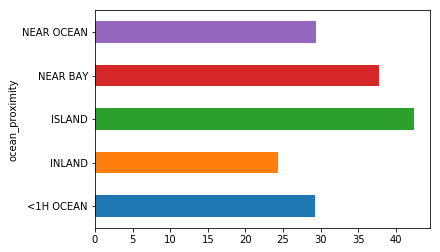

In [6]:
cali.groupby('ocean_proximity').mean()['housing_median_age'].plot.barh()

Text(0.5,1,'rooms')

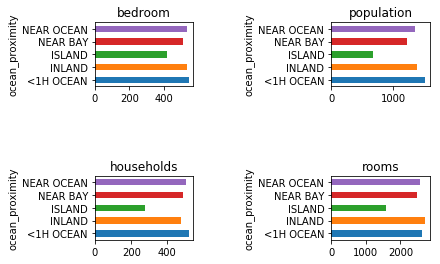

In [8]:
## 변수들 모두 subplot을 한 눈에 알아볼 수 있게 배열 할 수 있다. 
## 4개의 dataframe형성 
## 그 중에서 4개의 변수만 그려본다
##subplot할때 nrow =3, ncol = 3 해야 이쁘게 나온다.
plt.subplot(3,3,1)
cali.groupby('ocean_proximity').mean()['total_bedrooms'].plot.barh()
plt.title('bedroom')

plt.subplot(3,3,3)
cali.groupby('ocean_proximity').mean()['population'].plot.barh()
plt.title('population')

plt.subplot(3,3,7)
cali.groupby('ocean_proximity').mean()['households'].plot.barh()
plt.title('households')

plt.subplot(3,3,9)
cali.groupby('ocean_proximity').mean()['total_rooms'].plot.barh()
plt.title('rooms')

## Median_income 과 Median_house_value의 Scatterplot을 그려보자

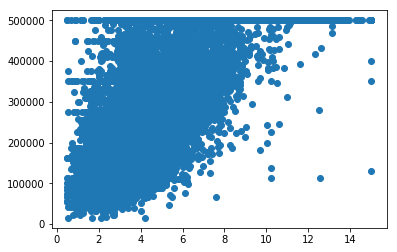

In [9]:
plt.scatter(cali.median_income,cali.median_house_value)

In [11]:
##색깔을 입혀보자. 거주지역이 NEAR_BAY인 사람들과 아닌 사람들로 나눠서 보고싶다면?
cols = []
for i in cali['ocean_proximity']:
    choice = 0
    if i == 'NEAR OCEAN':
        choice = 1
        
    else:
        choice = 2
    cols.append(choice)

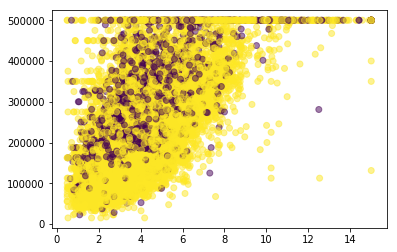

In [12]:
##방금만든 cols를 활용한다. 점들이 겹치기 때문에 투명도도 준다.(c, alpha 활용)
plt.scatter(cali.median_income,cali.median_house_value,c=cols,alpha=0.5)

## 위도와 경도 자료를 활용, size는 population/100, color를 median_house value로 해서 지도를 그려보아라

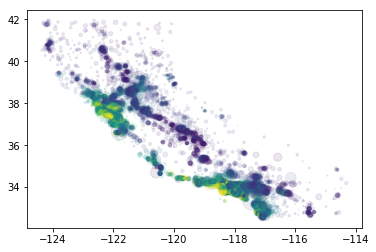

In [14]:
plt.scatter(x=cali.longitude,y=cali.latitude,s=cali.population/100,c=cali.median_house_value,alpha=0.1)